In [1]:
from alphabet import load_alphabet, char_token
from synthetic import create_alphabet_image
import numpy as np
from pathlib import Path
import tqdm as tqdm
from gan.Hdataset import load_the_dataset
from PIL import Image

In [2]:
dataaset = load_the_dataset('data/alphabet/')
#test = np.concatenate([row for row in dataaset])
print(len(dataaset))

26


In [12]:
raw_alphabet = load_alphabet()

Class sizes: [3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000]
Total number of classes: 26


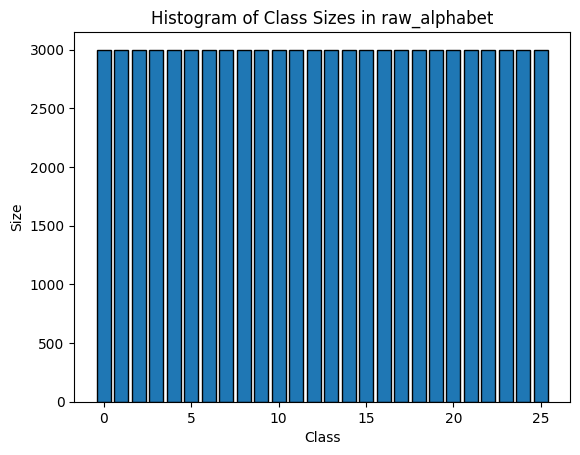

In [13]:
import matplotlib.pyplot as plt

# Calculate the size of each class
class_sizes = [len(raw_alphabet[cls]) for cls in raw_alphabet]

print("Class sizes:", class_sizes)
print("Total number of classes:", len(raw_alphabet))

# Plot the histogram
plt.bar(range(len(raw_alphabet)),class_sizes, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Size')
plt.title('Histogram of Class Sizes in raw_alphabet')
plt.show()

In [4]:
letters = list(char_token.keys())[:len(raw_alphabet)+1]	
sample = create_alphabet_image(letters, (400,400), raw_alphabet)
plt.imshow(sample.image, cmap="Greys")
plt.show()

KeyError: 'Kaf-final'

In [5]:

def find_bbox(img):
    """
    img : 2D numpy array (grayscale) or 3D (H×W×C).
    Assumes the background value is the most frequent pixel in img.
    Returns (y0, y1, x0, x1) inclusive bounds.
    """
    # If color, collapse to gray‐scale or just look at one channel:
    if img.ndim == 3:
        arr = img[...,0]
    else:
        arr = img

    # find background = most common value
    vals, counts = np.unique(arr, return_counts=True)
    bg = vals[np.argmax(counts)]

    # mask of “foreground” pixels
    mask = (arr != bg)
    if not mask.any():
        # nothing but background
        return 0, img.shape[0]-1, 0, img.shape[1]-1

    # get coordinates of non‐bg pixels
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    return y0, y1, x0, x1

def crop_to_bbox(img):
    y0, y1, x0, x1 = find_bbox(img)
    # for a 2D array:
    return img[y0:y1+1, x0:x1+1]


In [ ]:
reverse_class = [np.max(class_sizes)-cs for cs in class_sizes]

for i, ammount in enumerate(reverse_class):
    let = f'{letters[i]}'.split(".")[1].replace("_", "-")
    #print(let)
    if let == 'Kaf-final':
        let = 'Zayin'
        oi = i
        i = 26
    file_count = len(list(Path(f"data/alphabet/{let}").glob("*.pgm")))
    ammount = 3000 - file_count
    print(f"Class {i} has {file_count}")
    if ammount > 0:
        print(f"Class {i} has {ammount} missing samples. {letters[i]}")
        for j in tqdm.tqdm(range(ammount)):
            sample = create_alphabet_image([letters[i]], (200,200), raw_alphabet)
            # sample.image.save(f"missing_samples/class_{i}_sample_{j}.png")
            # plt.imshow(sample.image, cmap="Greys")
            path = Path(f"missing_samples/{let}")
            path.mkdir(parents=True, exist_ok=True)
            out = Image.fromarray(crop_to_bbox(sample.image))
            out = out.resize((32, 32))
            # out = Image.fromarray(sample.image)
            out.save(f"data/alphabet/{let}/syntetic_{j}.pgm")

            # plt.imshow(out, cmap="Greys")
            # plt.axis('off')
            # plt.savefig(f"missing_samples/{let}/sample_{j}.png",bbox_inches='tight')
            # print(f"Saved missing sample {j} for class {i}.")
    
    if let == 'Kaf-final':
        i = oi

Class 0 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2314.98it/s]


Class 1 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2339.78it/s]


Class 2 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2299.71it/s]


Class 3 has 91


100%|██████████| 2909/2909 [00:00<00:00, -5502.84it/s]


Class 4 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2238.47it/s]


Class 5 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2112.88it/s]


Class 6 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2363.07it/s]


Class 7 has 193


100%|██████████| 2807/2807 [00:01<00:00, 2135.27it/s]


Class 26 has 12


100%|██████████| 2988/2988 [00:01<00:00, 2164.81it/s]


Class 9 has 294


100%|██████████| 2706/2706 [00:01<00:00, 2477.74it/s]


Class 10 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2434.78it/s]


Class 11 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2388.30it/s]


Class 12 has 130


100%|██████████| 2870/2870 [00:01<00:00, 2456.07it/s]


Class 13 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2281.81it/s]


Class 14 has 37


100%|██████████| 2963/2963 [00:01<00:00, 2217.74it/s]


Class 15 has 15


100%|██████████| 2985/2985 [00:01<00:00, 2310.84it/s]


Class 16 has 265


100%|██████████| 2735/2735 [00:01<00:00, 2031.92it/s]


Class 17 has 78


100%|██████████| 2922/2922 [00:01<00:00, 2194.48it/s]


Class 18 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2281.16it/s]


Class 19 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2116.45it/s]


Class 20 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2330.77it/s]


Class 21 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2125.15it/s]


Class 22 has 73


100%|██████████| 2927/2927 [00:01<00:00, 2320.66it/s]


Class 23 has 300


100%|██████████| 2700/2700 [00:01<00:00, 2144.93it/s]


Class 24 has 116


100%|██████████| 2884/2884 [00:01<00:00, 2031.36it/s]


Class 25 has 23


100%|██████████| 2977/2977 [00:01<00:00, 2039.77it/s]


In [ ]:
dataaset = load_hebrew_dataset('data/alphabet/')
print(dataaset.shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (27,) + inhomogeneous part.

In [10]:
import os

def delete_sample_images(root_folder):
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.startswith("syntetic_"):
                file_path = os.path.join(dirpath, filename)
                try:
                    os.remove(file_path)
                    print(f"Deleted: {file_path}")
                except Exception as e:
                    print(f"Error deleting {file_path}: {e}")

# Specify the root folder
root_folder = "data/alphabet/"
delete_sample_images(root_folder)

Deleted: data/alphabet/Tet/syntetic_2079.pgm
Deleted: data/alphabet/Tet/syntetic_229.pgm
Deleted: data/alphabet/Tet/syntetic_3466.pgm
Deleted: data/alphabet/Tet/syntetic_939.pgm
Deleted: data/alphabet/Tet/syntetic_467.pgm
Deleted: data/alphabet/Tet/syntetic_1724.pgm
Deleted: data/alphabet/Tet/syntetic_3471.pgm
Deleted: data/alphabet/Tet/syntetic_325.pgm
Deleted: data/alphabet/Tet/syntetic_2534.pgm
Deleted: data/alphabet/Tet/syntetic_1056.pgm
Deleted: data/alphabet/Tet/syntetic_766.pgm
Deleted: data/alphabet/Tet/syntetic_2300.pgm
Deleted: data/alphabet/Tet/syntetic_682.pgm
Deleted: data/alphabet/Tet/syntetic_231.pgm
Deleted: data/alphabet/Tet/syntetic_1375.pgm
Deleted: data/alphabet/Tet/syntetic_2860.pgm
Deleted: data/alphabet/Tet/syntetic_314.pgm
Deleted: data/alphabet/Tet/syntetic_808.pgm
Deleted: data/alphabet/Tet/syntetic_3391.pgm
Deleted: data/alphabet/Tet/syntetic_1575.pgm
Deleted: data/alphabet/Tet/syntetic_989.pgm
Deleted: data/alphabet/Tet/syntetic_2982.pgm
Deleted: data/alphab